# Proyek Analisis Data: E-Commerce Public Dataset
Mengembangkan proyek analisis data menggunakan dataset publik e-commerce untuk mengeksplorasi tren penjualan, perilaku pelanggan, dan performa produk. proyek ini mencakup pengumpulan data, pembersihan, dan transformasi data untuk analisis lebih lanjut. menerapkan exploratory data analysis (eda) untuk mengidentifikasi pola, segmentasi pelanggan, dan faktor-faktor yang memengaruhi penjualan. hasil analisis divisualisasikan melalui dashboard interaktif untuk memudahkan interpretasi dan pengambilan keputusan berbasis data.
- **Nama:** Yogik Septiadi
- **Email:** Yogikseptiadi@gmail.com

## Menentukan Pertanyaan Bisnis

1. Kapan pembelian terakhir pelanggan dan Customer dengan Recency Terlama? dan bagaimana distribusinya? (Recency)
2. Bagaimana Pembelian Barang Berdasarkan Lokasi? (Frequency)
3. Produk mana yang memiliki tingkat penjualan tertinggi? (Frequency)
4. Berapa rata rata pengeluaran customer dan siapa yang memiliki pengeluaran terbanyak? (Monetary)
5. Metode pembayaran apa yang paling sering digunakan oleh pelanggan, dan bagaimana ini mempengaruhi tingkat kepuasan atau review? (Clustering)
6. Bagaimana distribusi kualitas pelayanan penjual berdasarkan kategori rating? apa hubungan antara rating penjual dengan total penjualan(scaterplot)?
7. Produk apasaja yang paling diminati berdasarkan (lokasi)? (Geospatial Analysis)
8. Berapa Revenue dari hasil penjualan berdsarkan tahun dan bulan ?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
#customer
customers_df = pd.read_csv("Data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#geolocation
geolocation_df = pd.read_csv("Data\geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
#order item
item_df = pd.read_csv("Data\order_items_dataset.csv")
item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#order payment
payment_df = pd.read_csv("Data\order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
#order review
review_df = pd.read_csv("Data\order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
#orders dataset
orders_df = pd.read_csv("Data\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#product category translation
translation_df = pd.read_csv("Data\product_category_name_translation.csv")
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
#product dataset
product_df = pd.read_csv("Data\products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#seller dataset
seller_df = pd.read_csv("Data\sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Terdapat 9 dataset utama

### Assessing Data

#### Customers

In [11]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Geolocation

In [14]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### orders items

In [17]:
item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
item_df[item_df['freight_value'] == 0.0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


In [19]:
item_df.info()
item_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order payments

In [20]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
payment_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Order Review

In [23]:
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
review_df['review_comment_title'].count()

11568

In [27]:
review_df['review_comment_message'].count()

40977

#### Orders Dataset

In [28]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [29]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [30]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


#### product category name translation

In [31]:
translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [32]:
translation_df.info()
translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

#### Products Dataset

In [33]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
product_df.info()
print("--------------")
product_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
--------------


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
product_df[product_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### Sellers Dataset

In [37]:
seller_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [38]:
seller_df.info()
print("================")
seller_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- terapat data kosong pada pada kolom review_comment_title dan review_comment_message pada data review
- terdapat data kosong pada data Products Dataset 
Kedua data kosong tersebut dapat mempengaruhi hasil analisis atas pertanyaan bisnis yang telah di deskripsikan di awal

### Cleaning Data

#### Data Review

In [39]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [40]:
# review_comment_title dan review_comment_message
review_df['review_comment_title'].fillna('No Title', inplace=True)
review_df['review_comment_message'].fillna('No Message', inplace=True)

In [41]:
review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Data Product

In [42]:
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [43]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [44]:
product_df['product_category_name'].fillna('Unknown', inplace=True)

In [45]:
product_df[product_df['product_category_name'] == 'Unknown']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Unknown,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Unknown,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Unknown,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Unknown,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Unknown,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,Unknown,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,Unknown,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,Unknown,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,Unknown,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [46]:
product_df['product_name_lenght'].fillna(0, inplace=True)

In [47]:
product_df['product_description_lenght'].fillna(0, inplace=True)

In [48]:
product_df['product_photos_qty'].fillna(0, inplace=True)

In [49]:
product_df['product_weight_g'].fillna(0, inplace=True)
product_df['product_length_cm'].fillna(0, inplace=True)
product_df['product_height_cm'].fillna(0, inplace=True)
product_df['product_width_cm'].fillna(0, inplace=True)


In [50]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
1. menambahkan isi pada kolom kosong review_comment_title dan review_comment_message pada data review yang nantinya akan digunakan wordcloud
2. mengganti nilai nan pada kategori produk dengan nama Unknown dan mengini nilai lain dengan 0

## Exploratory Data Analysis (EDA)

#### Pertanyaan 1

In [51]:
# Recency
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
current_date = datetime(2024, 11, 25)
orders_df['days_since_last_purchase'] = (current_date - orders_df['order_purchase_timestamp']).dt.days

recency = orders_df.groupby('customer_id')['days_since_last_purchase'].min().reset_index()
recency.columns = ['customer_id', 'Recency']

# Analysis
print("Rata-rata jumlah hari sejak pembelian terakhir:", recency['Recency'].mean())
print()
print("Pelanggan dengan waktu pembelian paling lama:")
purchasing = recency.sort_values(by='Recency', ascending=False)
purchasing.head(10)

Rata-rata jumlah hari sejak pembelian terakhir: 2520.272965879265

Pelanggan dengan waktu pembelian paling lama:


,customer_id,Recency
3354,08c5351a6aca1c1589a38f244edeee9d,3003
40289,683c54fc24d40ee9f8a6fc179fd9856c,3002
38013,622e13439d6b5a0b486c435618b2679e,2994
52277,86dc2ffce2dfff336de2f386a786e574,2992
68946,b106b360fe2ef8849fbbd056f777b4d5,2975
43183,6f989332712d3222b6571b1cf5b835ce,2974
85811,dc607dc98d6a11d5d04d9f2a70aa6c34,2974
49183,7ec40b22510fdbea1b08921dd39e63d8,2974
20701,355077684019f7f60a031656bd7262b8,2974
43698,70fc57eeae292675927697fe03ad3ff5,2974


In [52]:
current_date = datetime(2024, 11, 25)

# Menambahkan kolom tanggal pembelian terakhir
recency['last_purchase_date'] = current_date - pd.to_timedelta(recency['Recency'], unit='D')

# Menampilkan pelanggan dengan waktu pembelian paling lama
print(recency.sort_values(by='Recency', ascending=False).head())


                            customer_id  Recency last_purchase_date
3354   08c5351a6aca1c1589a38f244edeee9d     3003         2016-09-05
40289  683c54fc24d40ee9f8a6fc179fd9856c     3002         2016-09-06
38013  622e13439d6b5a0b486c435618b2679e     2994         2016-09-14
52277  86dc2ffce2dfff336de2f386a786e574     2992         2016-09-16
68946  b106b360fe2ef8849fbbd056f777b4d5     2975         2016-10-03


#### Pertanyaan 2

In [53]:
# Menggabungkan data berdasarkan customer_zip_code_prefix dan geolocation_zip_code_prefix
location_data = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
location_orders = pd.merge(location_data, orders_df, on='customer_id')

# Menghitung jumlah pesanan berdasarkan lokasi
orders_by_location = location_orders.groupby(['geolocation_city', 'geolocation_state']).size().reset_index(name='total_orders')
# print(orders_by_location.sort_values('total_orders', ascending=False))
Total_orders = orders_by_location.sort_values('total_orders', ascending=False)
Total_orders.head(10)

,geolocation_city,geolocation_state,total_orders
4455,rio de janeiro,RJ,1913894
5057,sao paulo,SP,1164450
625,belo horizonte,MG,737556
3502,niteroi,RJ,393175
1592,curitiba,PR,255731
4854,santos,SP,238952
4175,porto alegre,RS,228803
5459,são paulo,SP,207882
989,campinas,SP,170318
5773,uberlandia,MG,160498


In [54]:
lowest_sales = orders_by_location.sort_values('total_orders', ascending=True)
lowest_sales.head(176)

,geolocation_city,geolocation_state,total_orders
5298,são bernardino,SC,1
5330,são francisco do brejão,MA,1
123,almirante tamandaré do sul,RS,1
3592,nova padua,RS,1
5319,são domingos do sul,RS,1
...,...,...,...
5544,tamoios (cabo frio),RJ,1
4513,romelândia,SC,1
4221,poço redondo,SE,1
476,bacaxa (saquarema) - distrito,RJ,1


#### Pertanyaan 3

In [55]:
# Menggabungkan data produk dan item pesanan
product_sales = pd.merge(item_df, product_df, on='product_id')

# Menggabungkan dengan data terjemahan kategori produk untuk mendapatkan nama kategori dalam bahasa Inggris
product_sales = pd.merge(product_sales, translation_df, on='product_category_name', how='left')

# Hitung jumlah penjualan per kategori produk 
top_product_categories = product_sales.groupby('product_category_name_english').agg(
    total_sales=('order_item_id', 'size')
).reset_index().sort_values('total_sales', ascending=False)

# Mengganti Nama
top_product_categories = top_product_categories.rename(columns={'product_category_name_english': 'nama produk'})
top_product_categories.head(10)

,nama produk,total_sales
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


#### Pertanyaan 4

In [56]:
order_customer_data = pd.merge(item_df, orders_df, on='order_id', how='inner')
full_data = pd.merge(order_customer_data, customers_df, on='customer_id', how='inner')

# Menghitung total pengeluaran (Monetary) per pelanggan
monetary = full_data.groupby('customer_id')['price'].sum().reset_index()
monetary.columns = ['customer_id', 'Monetary']

# Analisis hasil
print("Rata-rata pengeluaran per pelanggan:", monetary['Monetary'].mean())
print()
print("Pelanggan dengan total pengeluaran terbesar:")
print(monetary.sort_values(by='Monetary', ascending=False).head())

Rata-rata pengeluaran per pelanggan: 137.7540763788945

Pelanggan dengan total pengeluaran terbesar:
                            customer_id  Monetary
8475   1617b1357756262bfa56ab541c47bc16   13440.0
91284  ec5b2ba62e574342386871631fafd3fc    7160.0
76948  c6e2731c5b391845f6800c97401a43a9    6735.0
94398  f48d464a0baaea338cb25f816991ab1f    6729.0
24603  3fd6777bbce08a352fddd04e4a7cc8f6    6499.0


#### Pertanyaan 5

In [57]:
# Mengelompokkan data berdasarkan jenis pembayaran dan menghitung total pembayaran
payment_stats = payment_df.groupby('payment_type')['payment_value'].sum().reset_index()

# Mengganti nama kolom untuk kejelasan
payment_stats.rename(columns={'payment_value': 'total_payments'}, inplace=True)

# Menghitung total pembayaran keseluruhan
total_transactions = payment_stats['total_payments'].sum()

# Menambahkan kolom persentase
payment_stats['percentage'] = (payment_stats['total_payments'] / total_transactions) * 100

# Menampilkan hasil dengan persentase, diurutkan dari total pembayaran terbesar
print(payment_stats.sort_values('total_payments', ascending=False))


  payment_type  total_payments  percentage
1  credit_card     12542084.19   78.344584
0       boleto      2869361.27   17.923569
4      voucher       379436.87    2.370166
2   debit_card       217989.79    1.361681
3  not_defined            0.00    0.000000


#### Pertanyaan 6

In [58]:
# Menggabungkan data item pesanan, penjual, dan ulasan
seller_reviews = pd.merge(item_df, review_df, on='order_id')
seller_reviews = pd.merge(seller_reviews, seller_df, on='seller_id')

# Menghitung total ulasan dan rata-rata skor ulasan per penjual
seller_total_review = seller_reviews.groupby('seller_id').agg(
    total_reviews=('review_score', 'size'),  # Jumlah ulasan
    avg_review_score=('review_score', 'mean')  # Rata-rata skor ulasan
).reset_index()

# Kategori Rating
def categorize_rating(avg_score):
    if avg_score >= 4.5:
        return "Excellent"
    elif 4.0 <= avg_score < 4.5:
        return "Good"
    elif 3.0 <= avg_score < 4.0:
        return "Fair"
    else:
        return "Poor"

seller_total_review['rating_category'] = seller_total_review['avg_review_score'].apply(categorize_rating)

# Menghitung jumlah penjual per kategori
category_counts = seller_total_review['rating_category'].value_counts().reset_index()
category_counts.columns = ['Rating Category', 'Number of Sellers']
print(category_counts)


  Rating Category  Number of Sellers
0            Good               1008
1       Excellent                984
2            Fair                756
3            Poor                342


In [59]:
# Menggabungkan data item pesanan, ulasan, dan penjual
seller_reviews_sales = pd.merge(item_df, review_df, on='order_id')
seller_reviews_sales = pd.merge(seller_reviews_sales, seller_df, on='seller_id')

# Menghitung total ulasan, rata-rata rating, dan total penjualan per penjual
seller_analysis = seller_reviews_sales.groupby('seller_id').agg(
    total_reviews=('review_score', 'size'),  # Jumlah ulasan
    avg_review_score=('review_score', 'mean'),  # Rata-rata rating
    total_sales=('price', 'sum')  # Total penjualan
).reset_index()

# Menambahkan kategori rating
def categorize_rating(avg_score):
    if avg_score >= 4.5:
        return "Excellent"
    elif 4.0 <= avg_score < 4.5:
        return "Good"
    elif 3.0 <= avg_score < 4.0:
        return "Fair"
    else:
        return "Poor"

seller_analysis['rating_category'] = seller_analysis['avg_review_score'].apply(categorize_rating)

# Tampilkan hubungan rata-rata rating dengan total penjualan
print(seller_analysis[['rating_category', 'total_sales']].groupby('rating_category').sum())


                 total_sales
rating_category             
Excellent         1169194.95
Fair              4285635.98
Good              7680667.09
Poor               391726.75


#### Pertanyaan 7

In [60]:
# Menggabungkan data pelanggan, produk, dan item pesanan
customer_product_sales = pd.merge(location_orders, product_sales, on='order_id')

# Menghitung jumlah penjualan per kategori produk di setiap geolocation
product_by_location = customer_product_sales.groupby(['geolocation_city', 'product_category_name']).size().reset_index(name='total_sales')


In [61]:
# Mengambil produk dengan penjualan terbanyak per geolocation
top_product_by_location = product_by_location.loc[product_by_location.groupby('geolocation_city')['total_sales'].idxmax()].reset_index(drop=True)

# Urutkan berdasarkan total_sales secara menurun
top_product_by_location = top_product_by_location.sort_values('total_sales', ascending=False)
top_product_by_location.head(10)

,geolocation_city,product_category_name,total_sales
4296,rio de janeiro,cama_mesa_banho,242018
4860,sao paulo,cama_mesa_banho,144377
605,belo horizonte,cama_mesa_banho,88054
3384,niteroi,utilidades_domesticas,42965
4675,santos,cama_mesa_banho,37772
4029,porto alegre,cama_mesa_banho,28767
1534,curitiba,moveis_decoracao,27559
5235,são paulo,cama_mesa_banho,25337
946,campinas,cama_mesa_banho,20804
5534,uberlandia,beleza_saude,19450


#### Pertanyaan 8

In [62]:
# Menggabungkan dataframe orders_df dan payment_df berdasarkan order_id
merged_df = pd.merge(orders_df, payment_df, on="order_id")

# Mengambil kolom yang diperlukan
merged_df['order_purchase_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year
merged_df['order_purchase_month'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.to_period('M')

# Menghitung total pendapatan per tahun
revenue_by_year = merged_df.groupby('order_purchase_year')['payment_value'].sum().reset_index()

# Menghitung total pendapatan per bulan
revenue_by_month = merged_df.groupby('order_purchase_month')['payment_value'].sum().reset_index()
# Menampilkan hasil perhitungan
print("Total Revenue per Tahun:")
print(revenue_by_year)

Total Revenue per Tahun:
   order_purchase_year  payment_value
0                 2016       59362.34
1                 2017     7249746.73
2                 2018     8699763.05


In [63]:
print("\nTotal Revenue per Bulan:")
print(revenue_by_month)


Total Revenue per Bulan:
   order_purchase_month  payment_value
0               2016-09         252.24
1               2016-10       59090.48
2               2016-12          19.62
3               2017-01      138488.04
4               2017-02      291908.01
5               2017-03      449863.60
6               2017-04      417788.03
7               2017-05      592918.82
8               2017-06      511276.38
9               2017-07      592382.92
10              2017-08      674396.32
11              2017-09      727762.45
12              2017-10      779677.88
13              2017-11     1194882.80
14              2017-12      878401.48
15              2018-01     1115004.18
16              2018-02      992463.34
17              2018-03     1159652.12
18              2018-04     1160785.48
19              2018-05     1153982.15
20              2018-06     1023880.50
21              2018-07     1066540.75
22              2018-08     1022425.32
23              2018-09        4439.54

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Kapan pembelian terakhir pelanggan dan Customer dengan Recency Terlama? (Recency)

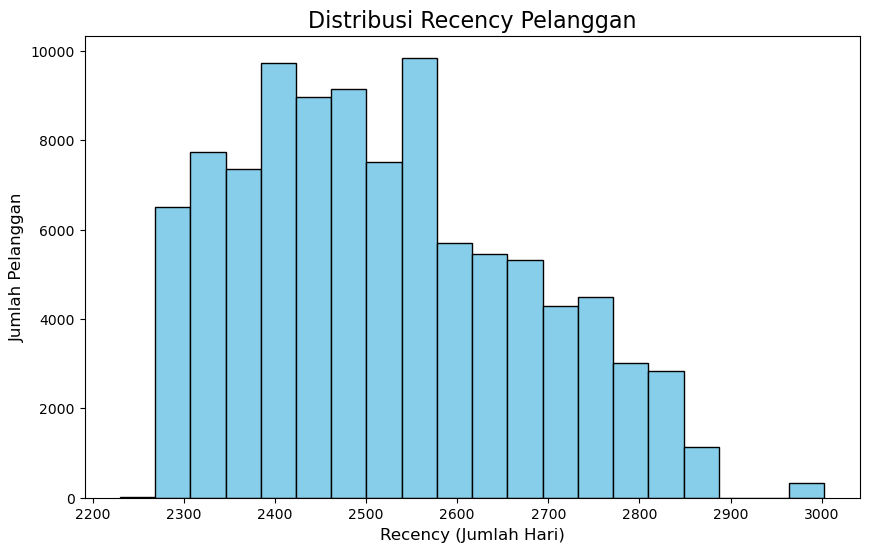

In [64]:
# Histogram Recency
plt.figure(figsize=(10, 6))
plt.hist(recency['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Recency Pelanggan', fontsize=16)
plt.xlabel('Recency (Jumlah Hari)', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

plt.show()



- Insight: 
1. Pelanggan dengan id *08c5351a6aca1c1589a38f244edeee9d* Memiliki Recency terlama terhitung pada tanggal 25 November 2024, karena data yang dipakai hanya terbatas pada tahun 2016-2018 maka setiap pelanggan memiliki tingkat recency yang sangat besar.
2. Mayoritas pelanggan memiliki recency antara 2400–2600 hari, menunjukkan bahwa sebagian besar pembelian terakhir terjadi dalam rentang tersebut.
3. Penurunan signifikan terlihat di luar rentang terutama pada recency mendekati 3000 hari, yang menunjukkan bahwa semakin lama waktu berlalu sejak pembelian terakhir, semakin sedikit pelanggan yang berinteraksi.
Saran:

- Saran/Rekomendasi :
1. Perlu diadakanya Program Reaktivasi Pelanggan
Program tersebut dapat berupa pembuatan sebuah campaign pemasaran yang ditargetkan untuk pelanggan dengan recency tinggi (di atas 2600 hari). Dengan memberikan insentif seperti diskon, voucher, atau promosi spesial untuk menarik mereka kembali bertransaksi.
2. Segmentasi Pelanggan
Perlunya pembuatan segmentasi pelanggan berdasarkan recency mereka (contoh: 2200–2400, 2400–2600, di atas 2600), lalu menggunakan  strategi komunikasi berbeda untuk masing-masing kelompok agar lebih relevan.
3. Analis Churn
Melakukan Analisis Churn dengan mengidentifikasi pola pelanggan dengan recency >2700 hari, dengan melakukan evaluasi mengapa mereka tidak lagi aktif, apakah karena kompetitor, kurangnya kepuasan, atau faktor lain.


### Pertanyaan 2:
2. Bagaimana Pembelian Barang Berdasarkan Lokasi? (Frequency)

C:\Users\Yogik\AppData\Local\Temp\ipykernel_15800\25795099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_locations['Location'] = top_locations['geolocation_city'] + ', ' + top_locations['geolocation_state']


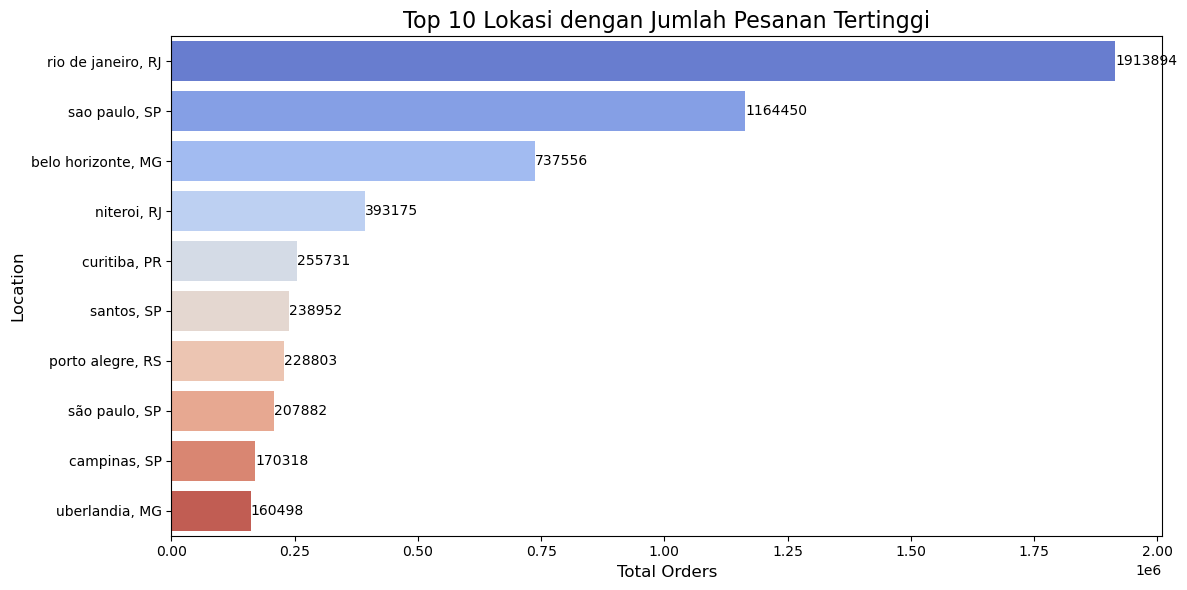

In [65]:
# 10 lokasi dengan jumlah pesanan tertinggi
top_locations = Total_orders.head(10)

# Kolom kombinasi geolocation_city dan geolocation_state
top_locations['Location'] = top_locations['geolocation_city'] + ', ' + top_locations['geolocation_state']

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_orders', y='Location', data=top_locations, palette='coolwarm')
plt.title('Top 10 Lokasi dengan Jumlah Pesanan Tertinggi', fontsize=16)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Location', fontsize=12)

# Menampilkan nilai di batang
for index, value in enumerate(top_locations['total_orders']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


- Insight:
1. Rio de Janeiro (RJ) menempati posisi pertama dengan total penjualan sebesar 1.913.894. Hal ini menunjukkan bahwa kota ini merupakan pasar terbesar dan mungkin memiliki potensi pelanggan yang sangat aktif. Hal ini juga menimbulkan kesenjangan terhadap kota kota yang lain karena total penjualan yang sangat berbeda jauh.
2. Ada 176 kota yang hanya memiliki 1 kali penjualan, seperti Vitoria do Jari (AP). Ini menunjukkan bahwa banyak kota yang belum tergarap secara optimal.

- Saran/Rekomendasi:
1. Fokus pada Pasar Utama:
Dengan mengoptimalkan strategi pemasaran dan distribusi di Rio de Janeiro untuk memperkuat posisi dominan dan gunakan data pelanggan untuk personalisasi penawaran.

2. Ekspansi ke Kota Lain:
Melakukan peningkatan penetrasi di kota lain seperti Sao Paulo dan Belo Horizonte, yang memiliki penjualan tinggi tetapi masih di bawah Rio de Janeiro. Fokuskan pada campaign iklan lokal dan promosi produk unggulan.

3. Target Pasar Baru:
Melakukan analisa dan Identifikasi peluang di kota-kota dengan penjualan rendah, terutama yang memiliki populasi besar tetapi aktivitas minim dengan melakukan pendekatan yang lebih optimal


In [ ]:
lowest_sales = orders_by_location.sort_values('total_orders', ascending=True)
lowest_sales.head(176)

,geolocation_city,geolocation_state,total_orders
5298,são bernardino,SC,1
5330,são francisco do brejão,MA,1
123,almirante tamandaré do sul,RS,1
3592,nova padua,RS,1
5319,são domingos do sul,RS,1
...,...,...,...
5544,tamoios (cabo frio),RJ,1
4513,romelândia,SC,1
4221,poço redondo,SE,1
476,bacaxa (saquarema) - distrito,RJ,1


### Pertanyaan 3:
3. Produk mana yang memiliki tingkat penjualan tertinggi? (Frequency)

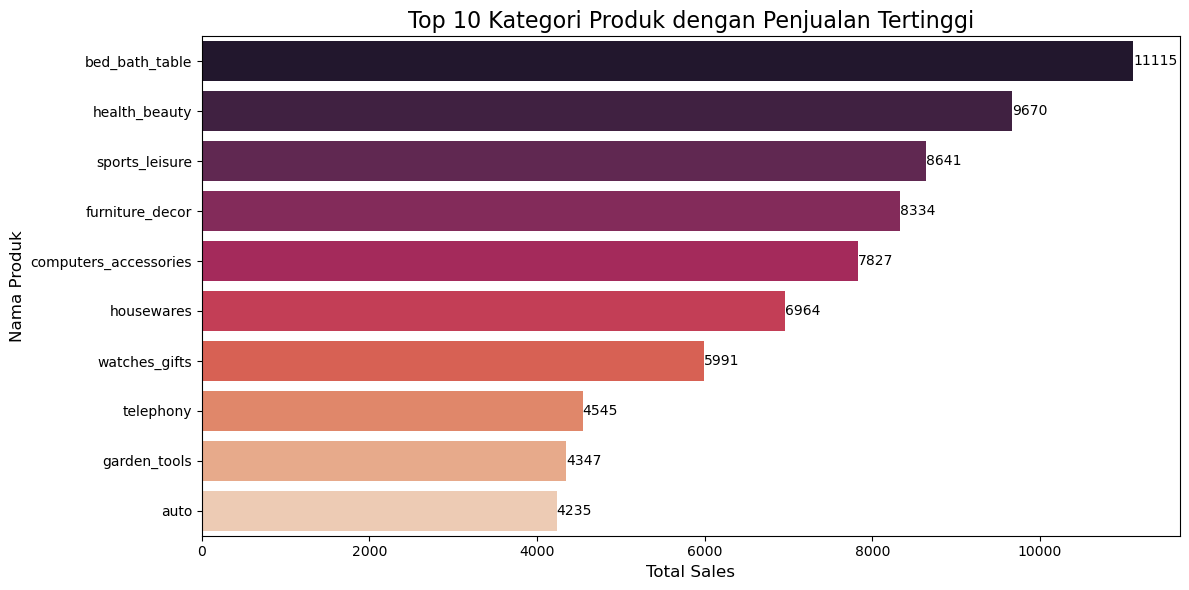

In [67]:
#10 kategori produk dengan penjualan tertinggi
top_categories = top_product_categories.head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='nama produk', data=top_categories, palette='rocket')
plt.title('Top 10 Kategori Produk dengan Penjualan Tertinggi', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

# Menampilkan nilai di batang
for index, value in enumerate(top_categories['total_sales']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


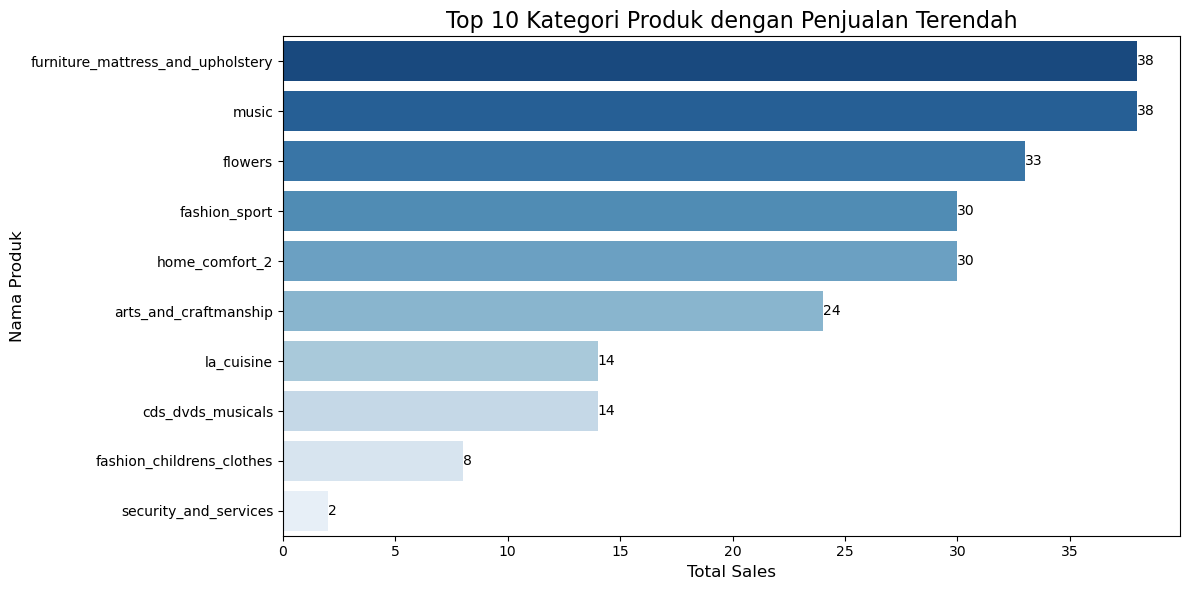

In [68]:
# 10 kategori produk dengan penjualan terendah
bottom_categories = top_product_categories.tail(10)

# Plot bar chart horizontal
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='nama produk', data=bottom_categories, palette='Blues_r')
plt.title('Top 10 Kategori Produk dengan Penjualan Terendah', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

# Menampilkan nilai di batang
for index, value in enumerate(bottom_categories['total_sales']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


- Insight:
1. Bed, Bath, and Table menjadi kategori produk teratas dengan total penjualan sebanyak 11.115. Ini menunjukkan tingginya permintaan untuk produk-produk rumah tangga. Security and services dan fashion childrens clothes merupakan 2 produk yang memiliki penjualan terendah diantara 71 jenis barang yang di jual.

- Saran/Rekomendasi:
1. Fokus pada Kategori Populer:
Meningkatkan stok dan variasi produk dalam kategori Bed, Bath, and Table serta Health & Beauty dan memberikan diskon atau promosi eksklusif untuk kategori ini karena merupakan penjualan terbanyak diantara yang lainya.

2. Strategi untuk Kategori dengan Penjualan Rendah:
Identifikasi penyebab rendahnya penjualan bisa jadi produk tidak relevan untuk pasar utama atau membutuhkan promosi yang lebih efektif.

3. Optimalisasi Pemasaran:
Sesuaikan campaign pemasaran dengan pola konsumsi pelanggan, seperti penawaran paket produk rumah tangga dan diskon untuk pembelian berulang.

### Pertanyaan 4:
4. Berapa rata rata pengeluaran customer dan siapa yang memiliki pengeluaran terbanyak? (Monetary)

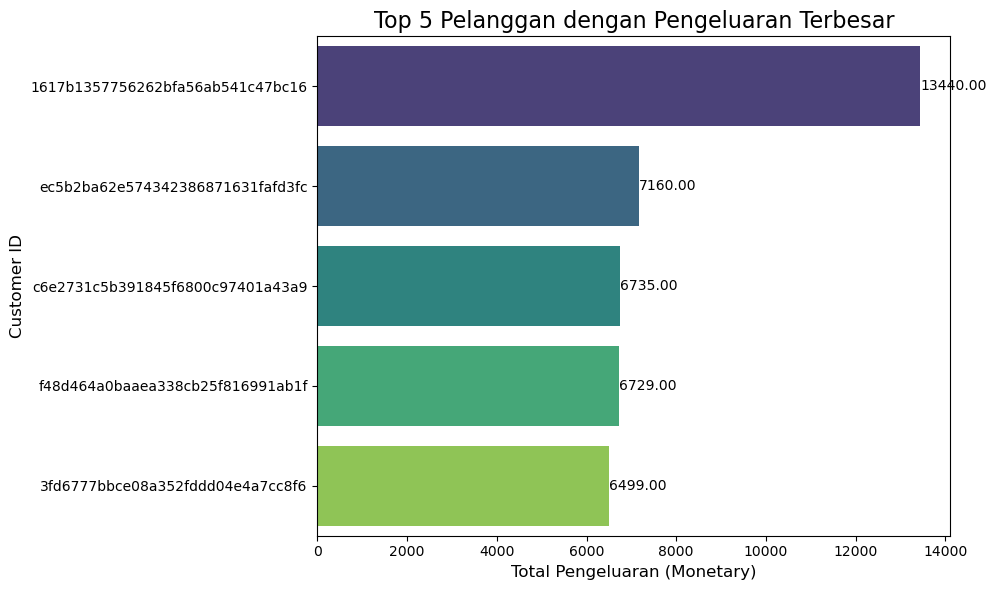

In [69]:
# 5 pelanggan dengan total pengeluaran terbesar
top_customers = monetary.sort_values(by='Monetary', ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Monetary', y='customer_id', data=top_customers, palette='viridis')
plt.title('Top 5 Pelanggan dengan Pengeluaran Terbesar', fontsize=16)
plt.xlabel('Total Pengeluaran (Monetary)', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)

# Menampilkan nilai di batang
for index, value in enumerate(top_customers['Monetary']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


- Insight:
1. Rata-rata pengeluaran per pelanggan adalah 137,75, menunjukkan mayoritas pelanggan melakukan pembelian dengan nominal kecil hingga sedang. Namun, terdapat ketimpangan signifikan, di mana pelanggan dengan pengeluaran terbesar mencapai 13.440, jauh melampaui rata-rata. Hal ini menunjukkan bahwa sebagian besar pendapatan perusahaan berasal dari segelintir pelanggan bernilai tinggi, sementara kontribusi mayoritas pelanggan cenderung kecil. Kondisi ini mengindikasikan potensi untuk mengidentifikasi dan memanfaatkan pelanggan bernilai tinggi melalui program loyalitas atau strategi personalisasi guna meningkatkan hubungan jangka panjang dan pendapatan.

- Saran/Rekomendasi:
1. Program Loyalitas untuk Pelanggan Besar:
Buat program eksklusif seperti diskon khusus atau hadiah loyalitas untuk pelanggan dengan pengeluaran tinggi agar mereka tetap loyal dan meningkatkan pembelian.

2. Segmentasi Pelanggan:
Lakukan segmentasi pelanggan berdasarkan pengeluaran untuk mengembangkan strategi pemasaran yang lebih personal, misalnya promosi premium untuk pelanggan besar dan penawaran hemat untuk pelanggan rata-rata.

3. Analisis Perilaku Pelanggan Tertinggi:
Meneliti lebih lanjut pola pembelian pelanggan dengan pengeluaran tinggi, seperti produk yang sering dibeli atau frekuensi pembelian, untuk meniru strategi serupa pada segmen pelanggan lain.

## Analisa Lanjutan

Analisis berikut ini bertujuan untuk melihat hubungan antara berbagai faktor seperti rating pelanggan,metode pembayaran, lokasi penjualan, dan kategori produk terhadap kinerja bisnis, serta mengidentifikasi pola yang dapat meningkatkan strategi pemasaran dan pengambilan keputusan.

### Pertanyaan 5:
5. Metode pembayaran apa yang paling sering digunakan oleh pelanggan, dan bagaimana ini mempengaruhi tingkat kepuasan atau review? (Clustering)

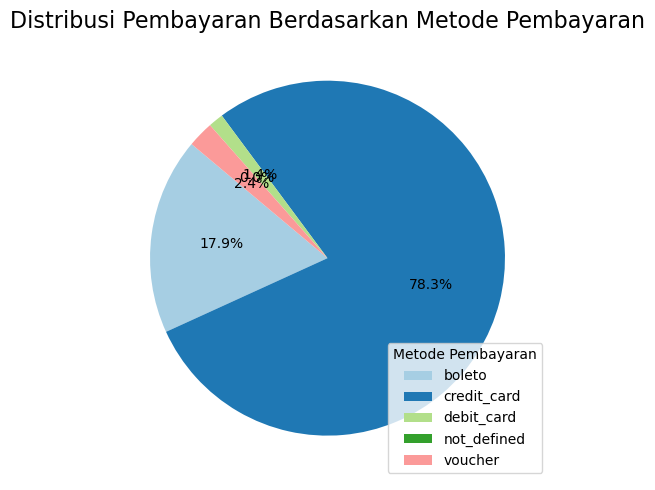

In [70]:
# Plot pie chart untuk persentase total pembayaran per metode pembayaran
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired(range(len(payment_stats)))  # Warna untuk pie chart
plt.pie(
    payment_stats['total_payments'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)


plt.title('Distribusi Pembayaran Berdasarkan Metode Pembayaran', fontsize=16)
plt.legend(payment_stats['payment_type'], loc='lower right', title='Metode Pembayaran')

plt.tight_layout()
plt.show()


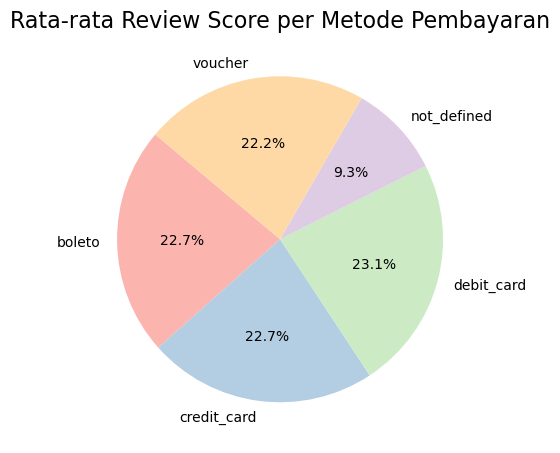

In [71]:
# Menggabungkan review_df dan payment_df berdasarkan order_id
merged_reviews_payments = pd.merge(payment_df, review_df, on='order_id')

# Mengelompokkan data berdasarkan metode pembayaran dan menghitung rata-rata review score
payment_stats = merged_reviews_payments.groupby('payment_type')['review_score'].mean().reset_index()

# Mengganti nama kolom untuk kejelasan
payment_stats.rename(columns={'review_score': 'avg_review_score'}, inplace=True)

plt.figure(figsize=(5, 5))
plt.pie(
    payment_stats['avg_review_score'], 
    labels=payment_stats['payment_type'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Pastel1(range(len(payment_stats)))
)

plt.title('Rata-rata Review Score per Metode Pembayaran', fontsize=16)
plt.tight_layout()
plt.show()


- Insight:
1. Metode pembayaran credit card mendominasi transaksi dengan kontribusi sebesar 73,88% dari total pembayaran, diikuti oleh boleto sebesar 19,06%. Metode voucher dan debit card memiliki persentase yang jauh lebih kecil, masing-masing 5,58% dan 1,47%. Sementara itu, kategori not_defined hampir tidak signifikan dengan hanya 0,003% dari total pembayaran. Dari segi rata-rata skor ulasan, metode debit card memiliki skor tertinggi (4,17), menunjukkan tingkat kepuasan pelanggan yang baik, meskipun penggunaannya relatif kecil. Sebaliknya, metode not_defined memiliki skor ulasan terendah (1,67), yang mungkin mengindikasikan masalah dalam proses pembayaran tersebut.

- Saran/Rekomendasi: 
1. Optimalkan metode pembayaran utama: 
Tingkatkan kualitas layanan untuk metode pembayaran *credit card* dan *boleto*, karena keduanya mencakup lebih dari 90% total transaksi. Pastikan proses pembayaran berjalan lancar tanpa kendala teknis.  

2. Promosikan metode debit card: 
Berikan insentif seperti diskon atau cashback untuk mendorong pelanggan menggunakan metode ini, mengingat skor ulasannya adalah yang tertinggi (4,17).  

3. Tingkatkan pengalaman voucher: 
Lakukan evaluasi terhadap metode pembayaran *voucher* untuk meningkatkan skor ulasannya dan memperluas penggunaannya, misalnya dengan memberikan promosi khusus bagi pengguna *voucher*.  

4. Investigasi metode not_defined: 
Lakukan analisis lebih lanjut untuk memahami penyebab skor ulasan rendah (1,67) pada metode ini dan segera perbaiki masalah yang ditemukan.  

5. Diversifikasi opsi pembayaran: 
Pertimbangkan untuk menambahkan metode pembayaran baru yang mungkin lebih menarik bagi pelanggan, seperti *e-wallet* atau metode pembayaran digital lainnya.  

### Pertanyaan 6:
6. Bagaimana distribusi kualitas pelayanan penjual berdasarkan kategori rating? apa hubungan antara rating penjual dengan total penjualan?


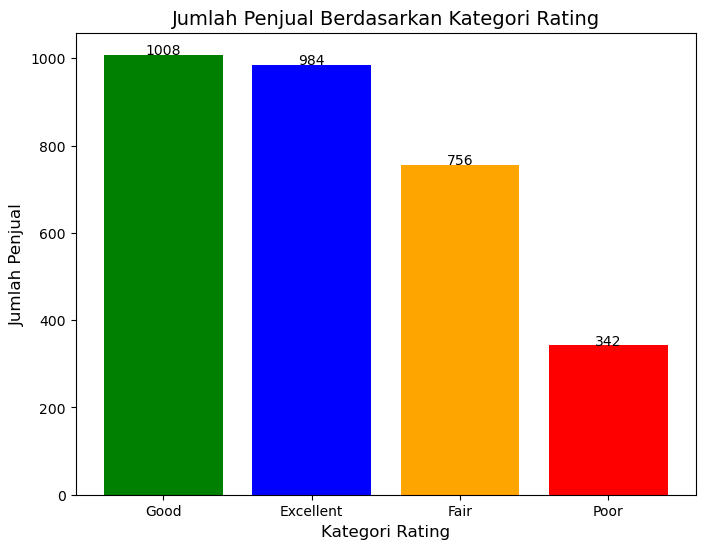

In [72]:
categories = category_counts['Rating Category']
counts = category_counts['Number of Sellers']

# bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'blue', 'orange', 'red'])
plt.title('Jumlah Penjual Berdasarkan Kategori Rating', fontsize=14)
plt.xlabel('Kategori Rating', fontsize=12)
plt.ylabel('Jumlah Penjual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10, color='black')

plt.show()


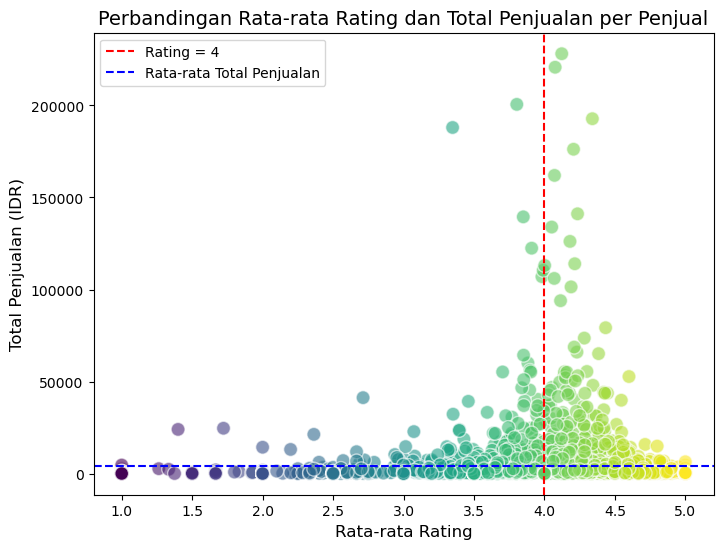

In [73]:
# Data
x = seller_analysis['avg_review_score']
y = seller_analysis['total_sales']

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=seller_analysis['avg_review_score'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)

# judul dan label
plt.title('Perbandingan Rata-rata Rating dan Total Penjualan per Penjual', fontsize=14)
plt.xlabel('Rata-rata Rating', fontsize=12)
plt.ylabel('Total Penjualan (IDR)', fontsize=12)
plt.axvline(x=4, color='red', linestyle='--', label='Rating = 4')
plt.axhline(y=y.mean(), color='blue', linestyle='--', label='Rata-rata Total Penjualan')
plt.legend()

# Menampilkan scatter plot
plt.show()

- Insight:
1. Berdasarkan data yang ada, mayoritas penjual termasuk dalam kategori rating "Good" (1008 penjual) dan "Excellent" (984 penjual), yang menunjukkan bahwa sebagian besar penjual memiliki skor ulasan yang baik. Namun, meskipun jumlah penjual dalam kategori Excellent hampir sama dengan kategori Good, penjual dengan rating Good mencatatkan total penjualan yang lebih tinggi, yaitu sebesar 7.68 juta dibandingkan dengan 1.17 juta dari penjual Excellent. Penjual dengan rating Fair juga menunjukkan total penjualan yang signifikan (4.29 juta), sementara penjual dengan rating Poor memiliki total penjualan yang sangat rendah, hanya sekitar 391 ribu.

- Saran/Rekomendasi: 
1. Fokus pada penjual dengan rating Fair dan Poor: 
Melakukan pembinaan atau bantuan kepada penjual yang memiliki rating Fair atau Poor untuk meningkatkan kualitas produk atau layanan mereka. Hal ini dapat meningkatkan skor ulasan mereka, yang kemungkinan besar akan berdampak positif pada penjualan mereka.

2. Pertahankan dan promosikan penjual dengan rating Excellent: 
Meskipun penjual dengan rating Excellent sedikit lebih sedikit, mereka memiliki total penjualan yang lebih rendah dibandingkan dengan penjual di kategori Good. Berikan insentif atau promosi untuk mendorong penjual Excellent meningkatkan jumlah produk yang dijual.

3. Pemanfaatan penjual dengan rating Good: 
Penjual dalam kategori Good yang memiliki total penjualan tertinggi (7,68 juta) menunjukkan bahwa kualitas ulasan yang baik dapat langsung berhubungan dengan total penjualan yang tinggi. Penjual di kategori ini harus diberikan dukungan tambahan untuk menjaga atau meningkatkan kinerja mereka, seperti pelatihan atau akses ke fitur tambahan di platform untuk memperluas jangkauan pasar mereka.

4. Peningkatan pengalaman pelanggan: 
Meningkatkan pengalaman pembeli (termasuk kemudahan bertransaksi dan kualitas produk) dapat membantu meningkatkan rating ulasan, yang akhirnya akan berpengaruh pada penjualan.








### Pertanyaan 7:
7. Produk apasaja yang paling diminati berdasarkan (lokasi)?
(Geospatial Analysis)

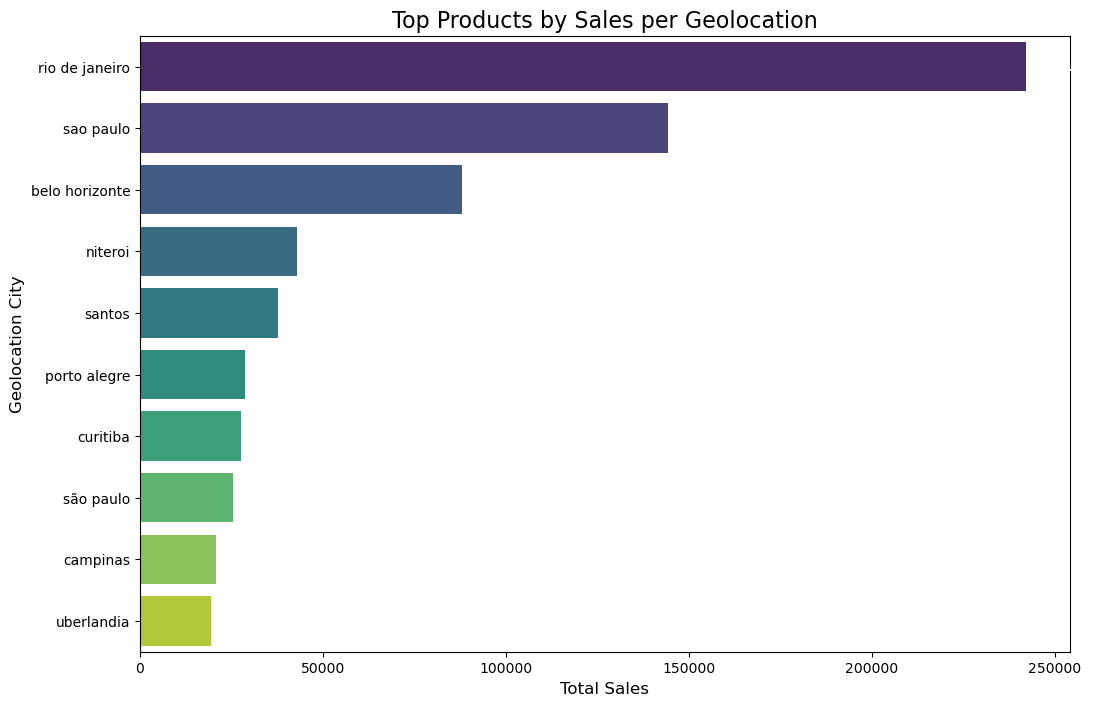

In [74]:
# Mengambil 10 produk teratas berdasarkan total sales
top_product_by_location = top_product_by_location.head(10)

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='geolocation_city', data=top_product_by_location, palette='viridis')
plt.title('Top Products by Sales per Geolocation', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Geolocation City', fontsize=12)

# Menampilkan nilai total sales di setiap batang
for index, value in enumerate(top_product_by_location['total_sales']):
    plt.text(value, index, f'{value}', va='center', fontsize=10, color='white', fontweight='bold')

# Menampilkan plot
plt.show()

- Insight:
1. Berdasarkan analisis geospasial, produk cama_mesa_banho (perlengkapan tidur dan mandi) mendominasi di beberapa kota besar di Brasil, dengan total penjualan tertinggi di Rio de Janeiro (242,018) dan São Paulo (144,377). Produk ini juga muncul sebagai produk terlaris di Belo Horizonte (88,054) dan Santos (37,772). Selain itu, kategori utilidades_domesticas (peralatan rumah tangga) di Niterói menempati urutan keempat dengan total penjualan 42,965, sementara kategori moveis_decoracao (perabotan dekorasi) di Curitiba juga cukup diminati dengan total penjualan 27,559. Kota São Paulo juga tercatat lagi sebagai lokasi dengan penjualan produk cama_mesa_banho sebesar 25,337, dan Campinas serta Uberlandia masing-masing menunjukkan penjualan untuk produk sejenis dengan angka 20,804 dan 19,450.

- Saran/Rekomendasi: 
1. Fokus pada Promosi Produk Cama_Mesa_Banho: 
Mengingat tingginya penjualan produk cama_mesa_banho di beberapa kota besar, perusahaan dapat fokus meningkatkan pemasaran dan promosi untuk produk ini, terutama di kota dengan penjualan lebih rendah untuk kategori ini, seperti Porto Alegre dan Campinas. Penawaran khusus atau diskon dapat menarik perhatian lebih banyak pembeli.


2. Penyusunan Strategi Berdasarkan Lokasi: 
Mengingat variatifnya produk yang diminati di berbagai kota, strategi pemasaran dan pengiriman dapat disesuaikan berdasarkan lokasi. Misalnya, kota seperti Niterói dan Uberlandia lebih cenderung membeli kategori utilidades_domesticas dan beleza_saude, sehingga stok barang dan promosi di wilayah tersebut dapat lebih fokus pada produk-produk terkait.

3. Ekspansi Produk di Pasar yang Sedikit Terjangkau: 
Kota seperti Porto Alegre dan Campinas memiliki potensi untuk produk cama_mesa_banho yang lebih tinggi. Oleh karena itu, pengenalan produk ini lebih lanjut di kota-kota tersebut, dengan menggunakan data geospasial, bisa meningkatkan volume penjualan.

### Pertanyaan 8:
8. Berapa Revenue dari hasil penjualan berdsarkan tahun dan bulan ?

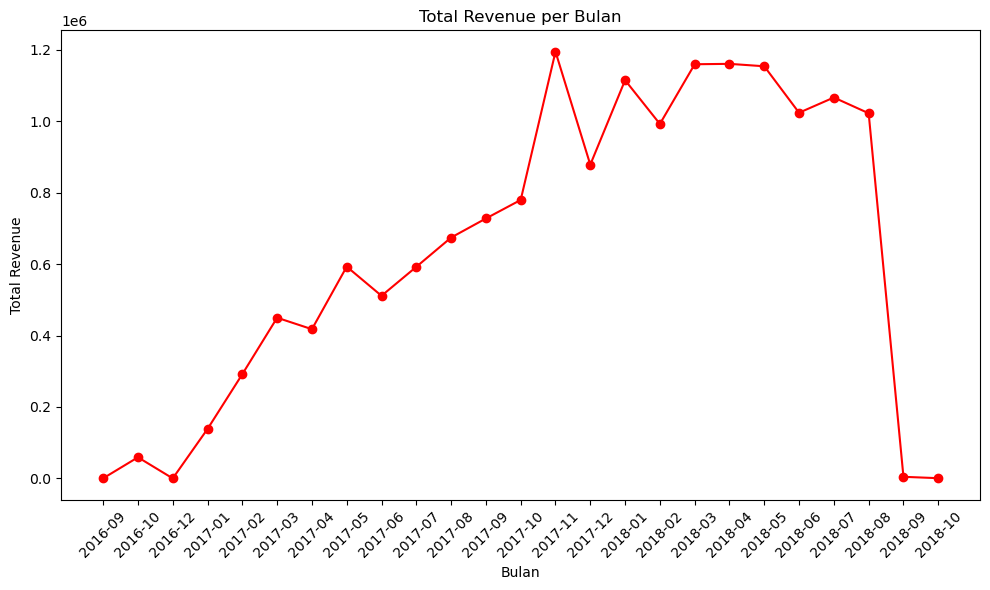

In [75]:
# Menggabungkan dataframe orders_df dan payment_df berdasarkan order_id
merged_df = pd.merge(orders_df, payment_df, on="order_id")

# Mengambil kolom yang diperlukan
merged_df['order_purchase_year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year
merged_df['order_purchase_month'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.to_period('M')

# Menghitung total pendapatan per bulan
revenue_by_month = merged_df.groupby('order_purchase_month')['payment_value'].sum().reset_index()

# Membuat grafik total revenue per bulan
plt.figure(figsize=(10,6))
plt.plot(revenue_by_month['order_purchase_month'].astype(str), revenue_by_month['payment_value'], marker='o', color='r')
plt.title('Total Revenue per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Insight:
1. Peningkatan Revenue yang Signifikan:
Terdapat lonjakan besar pada tahun 2017, di mana total revenue meningkat drastis dari 2016 (59362.34) menjadi 7.24 juta (7249746.73), dan kemudian sedikit meningkat lagi pada 2018 (8699763.05). Tahun 2017 secara signifikan lebih menguntungkan dibandingkan dengan tahun 2016 dan 2018. Tahun 2018 menunjukkan pendapatan yang lebih stabil, meskipun ada penurunan yang cukup signifikan pada bulan September 2018 (4439.54), dibandingkan bulan-bulan sebelumnya.

2. Fluktuasi Bulanan yang Signifikan:
Pada 2016, ada bulan dengan revenue sangat rendah, seperti Desember 2016 (19.62), dan bulan-bulan dengan pendapatan lebih tinggi seperti Oktober 2016 (59090.48). Di 2017, pendapatan relatif stabil, dengan bulan-bulan besar seperti November 2017 (1194882.80), meskipun ada sedikit penurunan pada bulan-bulan seperti Desember 2017 (878401.48).
Pada 2018, sebagian besar bulan memiliki pendapatan yang cukup tinggi, namun ada penurunan signifikan pada September 2018 (4439.54) dan Oktober 2018 (589.67), yang menunjukkan kemungkinan adanya perubahan yang perlu dianalisis lebih lanjut.

3. Bulan dengan Pendapatan Tertinggi:
Bulan dengan pendapatan tertinggi di 2017 adalah November 2017, dengan lebih dari 1.1 juta (1194882.80). Di 2018, pendapatan tertinggi tercatat pada Maret 2018 (1159652.12) dan April 2018 (1160785.48), meskipun ada penurunan signifikan di September 2018 dan Oktober 2018.

- Saran/Rekomendasi: 
1. Meneliti Penurunan Pendapatan pada 2018:
Perusahaan perlu meneliti penyebab penurunan pendapatan yang signifikan pada September 2018 dan Oktober 2018. Apakah ini disebabkan oleh faktor eksternal seperti musim atau kondisi pasar yang berubah, atau mungkin perubahan dalam strategi pemasaran atau penjualan yang perlu diperbaiki.

2. Meningkatkan Pendapatan di Bulan-Bulan dengan Penurunan:
Untuk bulan-bulan seperti Desember 2016, September 2018, dan Oktober 2018, yang mencatatkan pendapatan rendah, perusahaan bisa mengeksplorasi cara untuk meningkatkan aktivitas pemasaran atau menawarkan promo untuk mendorong penjualan.
Misalnya, meluncurkan promosi khusus atau event penjualan untuk menarik lebih banyak pelanggan.

4. Mengidentifikasi Faktor Penyebab Lonjakan Revenue di 2017:
2017 menunjukkan lonjakan revenue yang sangat besar. Mengidentifikasi strategi atau faktor yang menyebabkan peningkatan ini sangat penting untuk diterapkan kembali di tahun berikutnya. Perusahaan bisa menganalisis aktivitas atau kampanye pemasaran yang berkontribusi besar terhadap lonjakan pendapatan, dan berusaha untuk mereplikasi hal tersebut di masa depan.

5. Fokus pada Bulan-Bulan Terbaik:
November 2017 dan Maret-April 2018 menunjukkan pendapatan tinggi, yang bisa menjadi indikator bulan-bulan terbaik untuk bisnis. Perusahaan dapat fokus pada strategi yang lebih kuat di bulan-bulan tersebut, seperti meningkatkan produk atau kampanye pemasaran yang sudah terbukti efektif.

6. Strategi Peningkatan Keberlanjutan di 2018:
Meskipun tahun 2018 menunjukkan pendapatan yang lebih stabil dibandingkan 2017, masih ada penurunan yang perlu diatasi. Perusahaan perlu mempertimbangkan bagaimana untuk menjaga konsistensi pendapatan, dengan fokus pada keberlanjutan pendapatan di setiap bulan, termasuk periode pasca-penurunan di bulan September dan Oktober.

## Conclusion

Berdasarkan analisis, terdapat berbagai temuan penting yang dapat mendukung pengambilan keputusan strategis. Mayoritas pelanggan memiliki tingkat *recency* tinggi, menyoroti perlunya program reaktivasi pelanggan. Kota Rio de Janeiro memimpin penjualan, sementara kota-kota lain masih memiliki potensi untuk ditingkatkan. Kategori produk seperti *Bed, Bath, and Table* mendominasi penjualan, namun kategori dengan penjualan rendah memerlukan strategi pemasaran baru. Selain itu, sebagian besar pendapatan berasal dari pelanggan bernilai tinggi, menunjukkan pentingnya personalisasi program loyalitas. Metode pembayaran *credit card* mendominasi, tetapi perlu diversifikasi untuk meningkatkan kepuasan pelanggan. Analisis geospasial menyoroti perbedaan preferensi produk berdasarkan lokasi. Pendapatan melonjak signifikan pada tahun 2017, memberikan peluang untuk mereplikasi strategi sukses pada tahun mendatang. Hasil dari analisa ini menegaskan perlunya strategi pemasaran yang terfokus, inovasi produk, serta optimalisasi pengalaman pelanggan.